# Problem statement
- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
- The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
## goals of the Case Study
- There are quite a few goals for this case study:

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [25]:
# importing important libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)


# importing data set

In [26]:
df=pd.read_csv('Leads.csv')

In [27]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [28]:
df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [30]:
df.shape

(9240, 37)

# Cleaning the dataset

In [31]:
#we can drop the Prospect ID,Lead Number as it has all the unique values 
df = df.drop(['Prospect ID','Lead Number'], axis=1)

In [32]:
catc=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity']

    

### checking for the no. of unique values in the categorical columns 

In [33]:
for i in catc:
    print(df[i].value_counts())
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Do Not Call
No     9238
Yes       2
Name:

### dropping the columns with highly skewed data

- dropping ,(I agree to pay the amount through cheque, Get updates on DM Content, Update me on Supply Chain Content,Receive More Updates About Our Courses,Magazine) all the same data 
- dropping(Do Not Call,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations) these columns with highly skewed data
- dropping the tags because it is unnecessary 


In [34]:
df=df.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine','Do Not Call','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Tags'], axis=1)


In [35]:
# updating the  catc variable
catc=df.select_dtypes(include=['object']).columns

In [36]:
for i in catc:
    print(df[i].value_counts())
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Last Activity
Email Opened               

- there are multiple select present in the database which are basicly null so imputing null in place of them 

In [37]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [38]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


### finding the percentage of null values present in the columns

In [39]:
null_percent=100*df.isnull().sum()/len(df)
null_percent

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
How did you hear about X Education        78.463203
What is your current occupation           29.112554
Lead Quality                              51.590909
Lead Profile                              74.188312
City                                      39.707792
Asymmetrique Activity Index               45.649351
Asymmetrique Profile Index                45.649351
Asymmetrique Activity Score               45.649351
Asymmetrique Profile Score                45.649351
A free copy 

- dropping the columns with null values which is higher than 40 percent of the total values 


In [40]:
# Identify columns where more than 40% of the values are null
cols_to_drop = null_percent[null_percent > 40].index

In [41]:
# Removing all the columns that  have 40% null values
df.drop(cols_to_drop, axis=1, inplace=True)

In [43]:
df.shape

(9240, 14)

In [44]:
null_percent=100*df.isnull().sum()/len(df)
null_percent

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
What is your current occupation           29.112554
City                                      39.707792
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Country                                 6779 non-null   object 
 9   Specialization                          5860 non-null   object 
 10  What is your current occupation         6550 non-null   obje

In [46]:
# imputing the numerical columns with the median with null values less than 10 percent
df.fillna(df[['TotalVisits','Page Views Per Visit','TotalVisits']].median(), inplace=True)

In [47]:
null_percent=100*df.isnull().sum()/len(df)
null_percent

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
What is your current occupation           29.112554
City                                      39.707792
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

- if we drop all the null lines in the dataset we will loose a huge chunk of the data set so instead we will make the null a new category 

In [48]:
df['Specialization'] = df['Specialization'].fillna('not provided') 
df['Country'] = df['Country'].fillna('not provided')
df['What is your current occupation'] = df['What is your current occupation'].fillna('not provided')
df['City']=df['City'].fillna('not provided')

In [49]:
#dropping the null values()
df = df.dropna()

In [50]:
null_percent=100*df.isnull().sum()/len(df)
null_percent

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

- now all the null values has been treated



- after removing the null values and dropping the unnessary columns  there are 9103 left out of the 9240 rows and  16 columns out of the 37 colunns 

## standardizing the values

We've noticed that some categories/levels in the "Lead Score" and "Last Activity" columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, we're planning to group these categories together under "Others". That way, we can keep things neat and tidy and also correcting the lower and upper case of the gooogle.

In [51]:
# Grouping low frequency value levels to Others
df['Lead Source'] = df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df['Lead Source'] = df['Lead Source'].replace("google","Google")

In [52]:
# Grouping low frequency value levels to Others 
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

there are various countries in the Country columns which are very few in no. so we can change the other countries to outside india  so that the data is neat 

In [53]:
# tranfroming the data into more usable format
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']), axis = 1)
df['Country'].value_counts()

Country
India            6491
not provided     2325
outside india     287
Name: count, dtype: int64

### Mapping Binary categorical variables

In [54]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df['Do Not Email'] = df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [55]:
df.shape

(9103, 14)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   int64  
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Country                                 9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   object 
 

# spotting for the outliers

In [57]:
# defining a function to plot the numerical columns for outliers
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

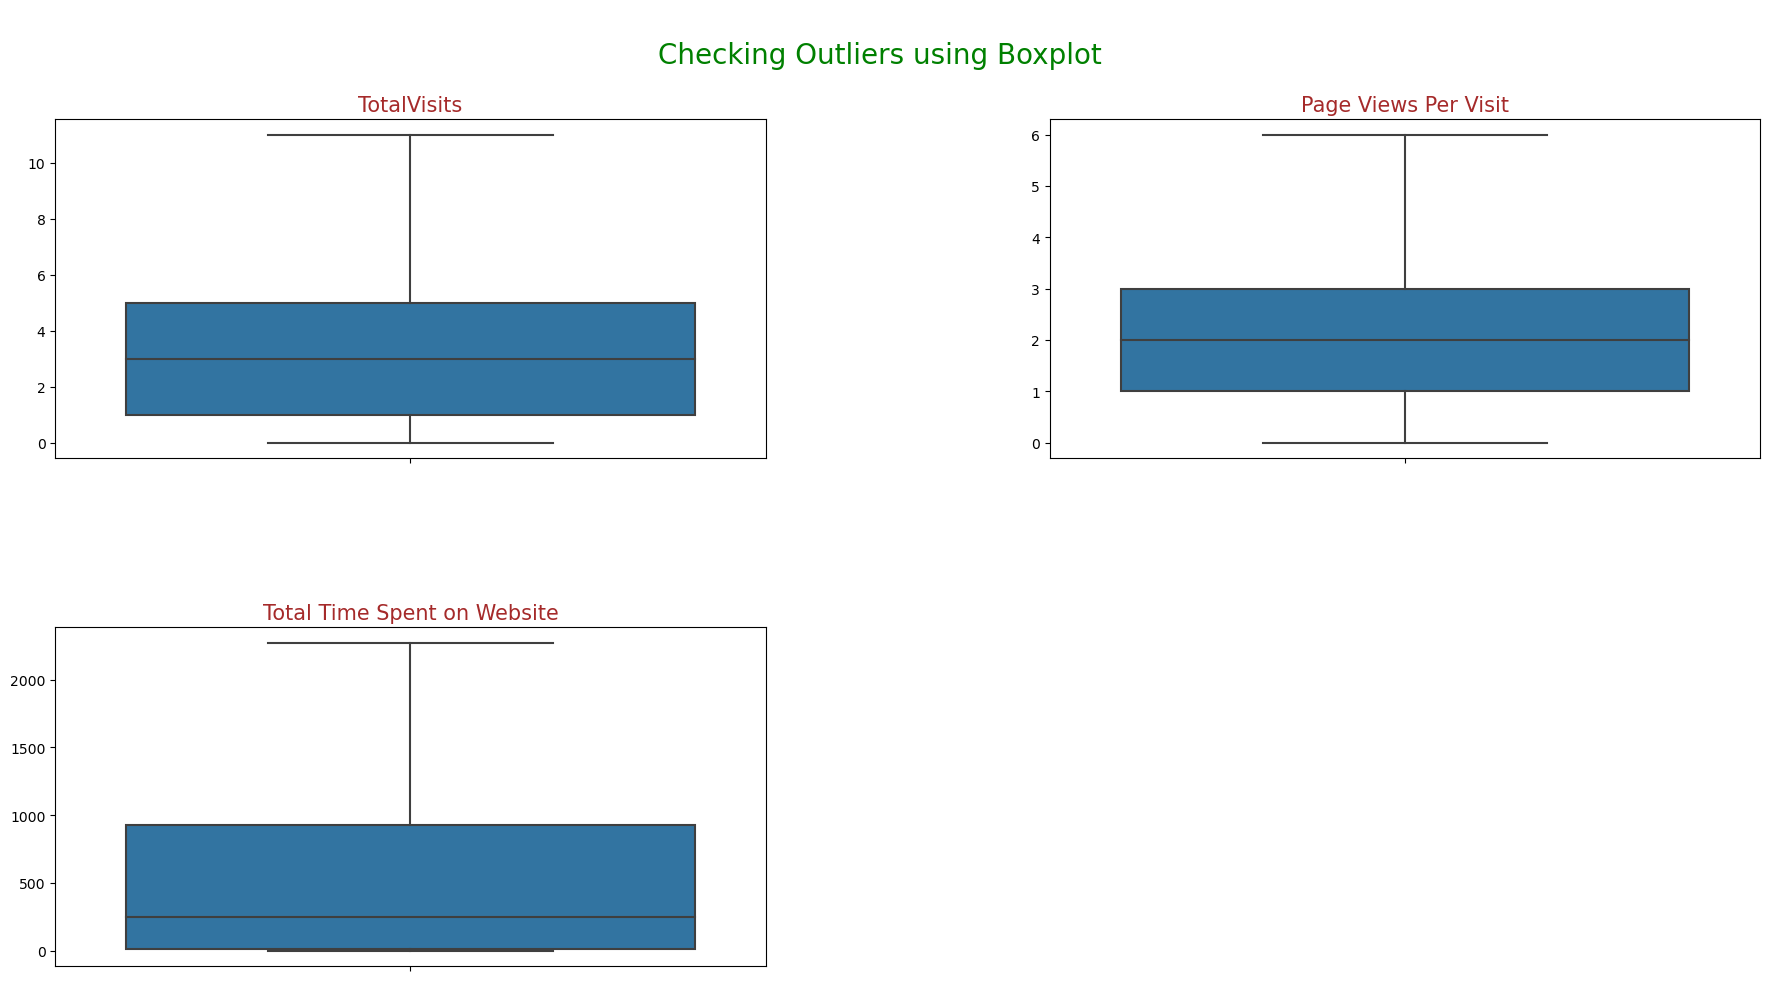

In [68]:
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(df,num_cols)

### there are outliers present in the Totalvisits and Page Views Per Visit columns so we have to treat them we can cap the outliers

# capping and flooring the outliers

In [69]:
# before outlier treatment
df.describe(percentiles=[.10,.25,.50,.75,.95])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.079205,0.379216,3.230034,483.773921,2.265096,0.317258
std,0.270073,0.485219,2.876234,545.519186,1.788199,0.465434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,247.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,924.000000,3.000000,1.000000
95%,1.000000,1.000000,10.000000,1557.000000,6.000000,1.000000
max,1.000000,1.000000,11.000000,2272.000000,6.000000,1.000000


In [70]:
# Defining function to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        

In [71]:
# cols that required to be treated
cols = ["TotalVisits","Page Views Per Visit"]
# applying the funtion
Outlier_treatment(df,cols)

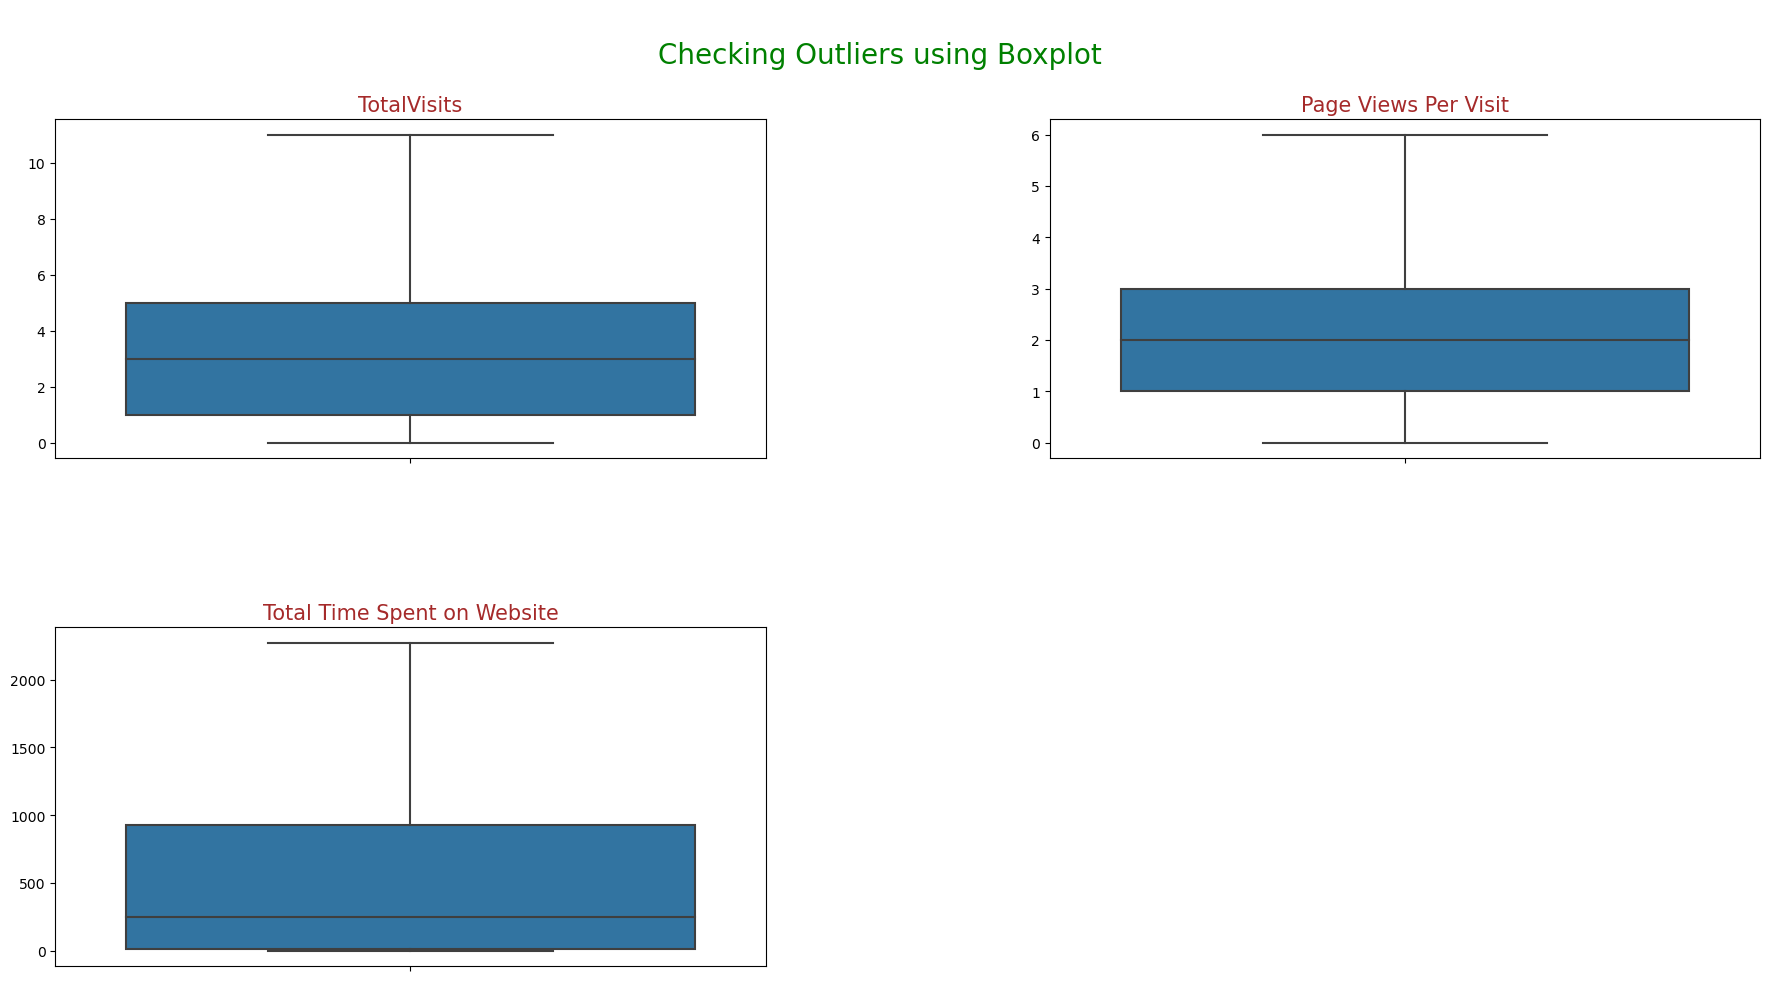

In [73]:
# rechecking the outliers 
Check_Outliers(df,num_cols)

- all the data has been cleaned and no further cleaning is necassary

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   int64  
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Country                                 9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   object 
 

In [75]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,not provided,not provided,Unemployed,not provided,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,not provided,Unemployed,not provided,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,not provided,Unemployed,Mumbai,0,Modified


# EDA

### checking for the data imbalance 

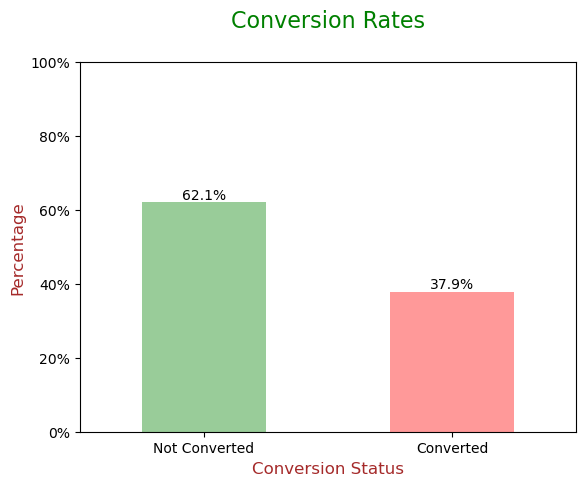

In [76]:
## ploting the results on bar plot

# Calculate the percentage of converted leads
conversion_percentages = 100 * df["Converted"].value_counts(normalize=True)

# Create a bar plot
ax = conversion_percentages.plot(kind='bar', color=["Green","Red"], alpha=0.4)

# Set the title and format it
plt.title("Conversion Rates\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})

# Label the axes
plt.xlabel('Conversion Status', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# Modify the y-axis ticks
y_ticks = np.arange(0, 101, 20)
y_labels = ["{}%".format(tick) for tick in y_ticks]
plt.yticks(y_ticks, y_labels)

# Set the x-axis ticks
plt.xticks([0, 1], ["Not Converted", "Converted"])
plt.xticks(rotation=0)

# Annotate the bars with their respective heights
for bar in ax.patches:
    ax.annotate('{:.1f}%'.format(bar.get_height()), (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()


- **Insights**
there are only 37.9% of people that are sucessfully converted into customers 
and there are 62.1 % of people that are not converted into the customers

# Univariate Analysis for Categorical Variables

In [77]:
# visualizing the categorical columns
# Select the columns with non-numeric data type
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'City', 'Last Notable Activity']


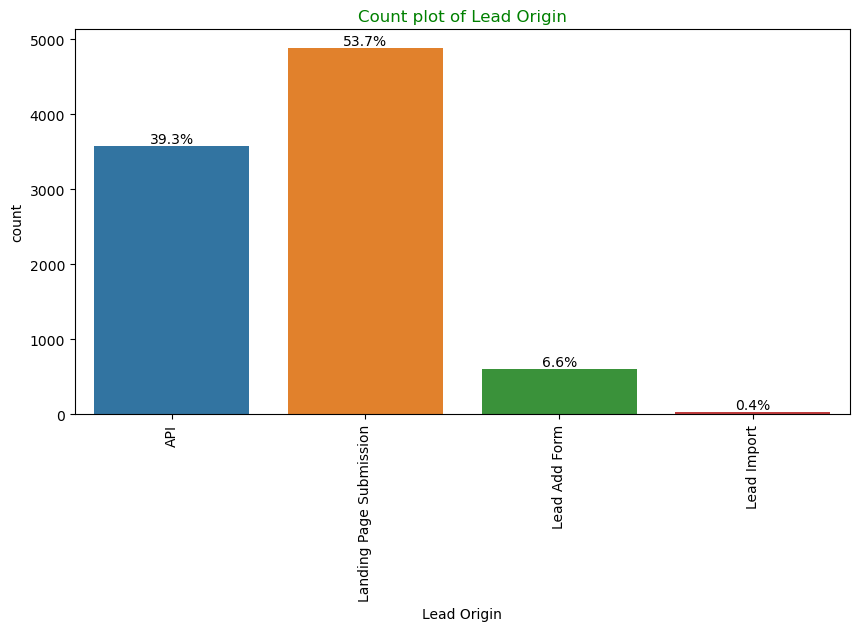

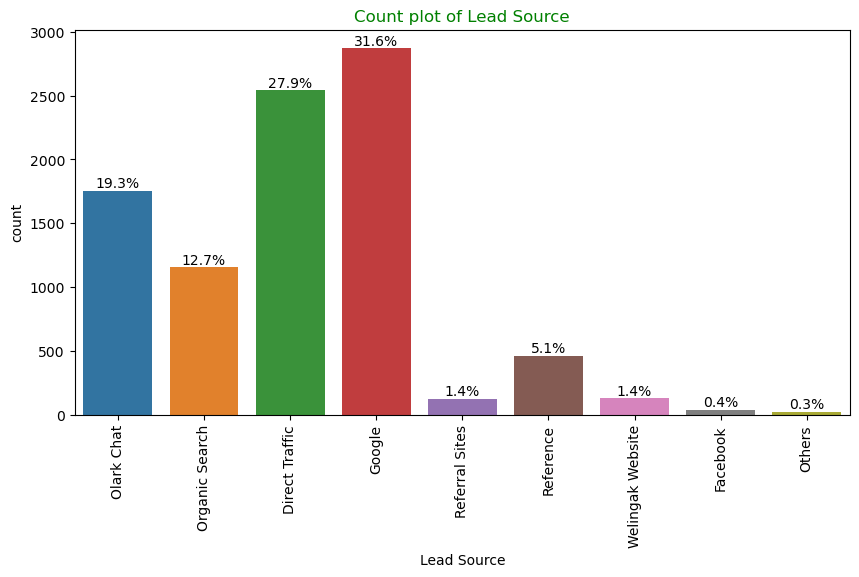

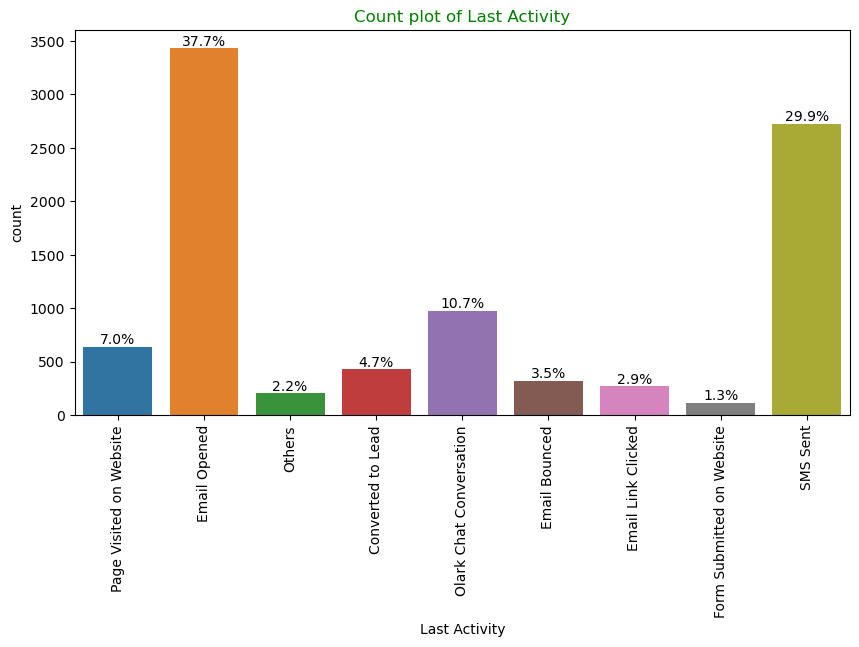

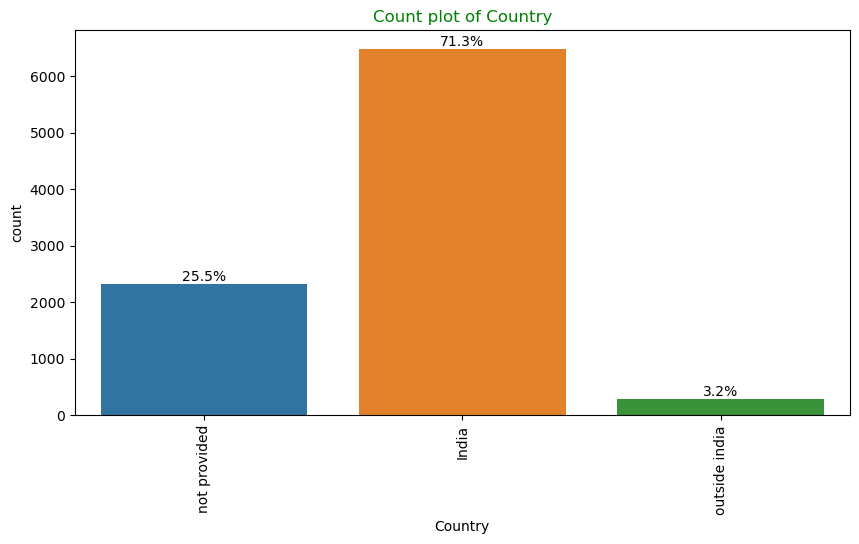

In [78]:
# countplot of columns with its value_counts percentage as annotation
for i in categorical_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df)
    total=len(df[i])
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

### Insights
- most of our visitors are from india 
- most of the activity is email opened and sms sent and converted to leads are very less
- most of our leads are from olark Chat, organic Search and google 
- the lead origin plot shows the lead import have lowest no. of individual and landing page submissions are the highest 

# Bivariate analysis of the categorical columns

In [81]:
# defining the funtion to grabh
def Bivariate_cat(df, variable_name, Target="Converted"):   
    plt.figure(figsize=(25,10))
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    ax1 = sns.countplot(x=variable_name, hue=Target, data=df, palette="coolwarm")
    plt.title("Distribution of {}".format(variable_name))
    plt.legend(title = "Converted")
    plt.xticks(rotation=90)
    
    # Annotation for 1st plot        
    for p in ax1.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / len(df))
        ax1.annotate(text, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    plt.tight_layout()
    plt.show()

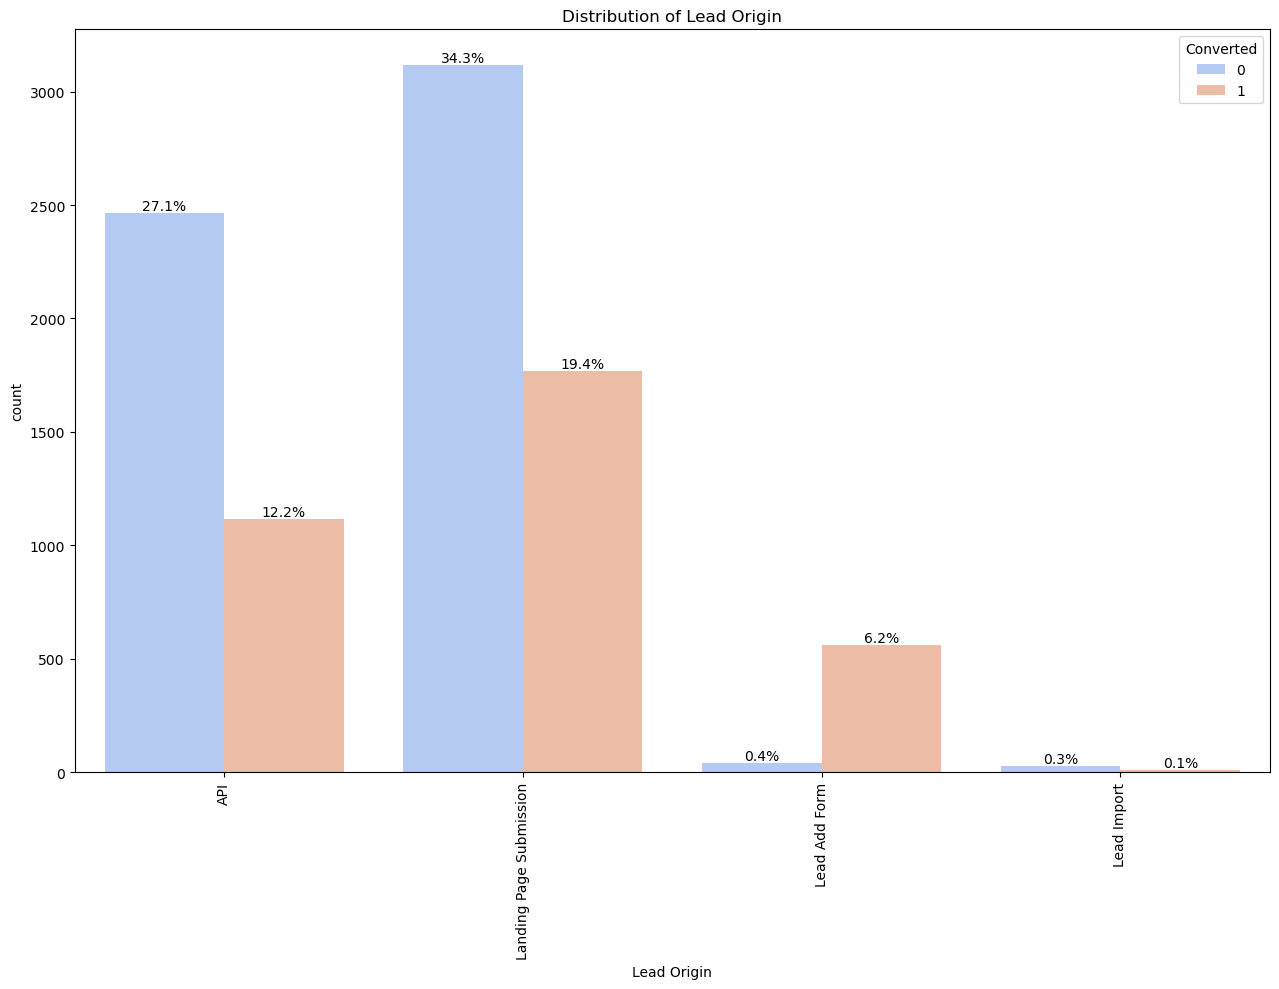

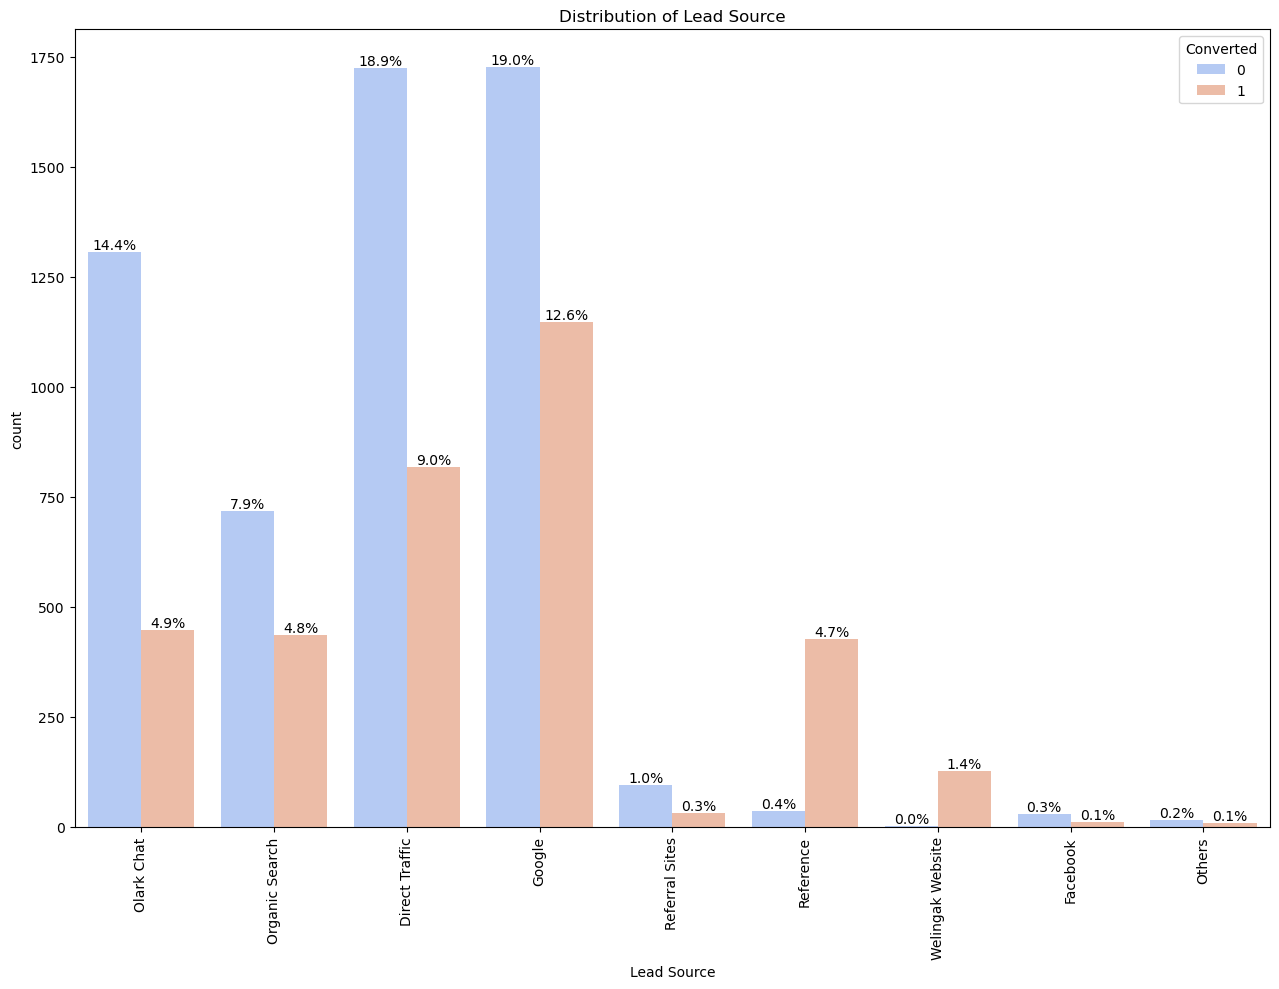

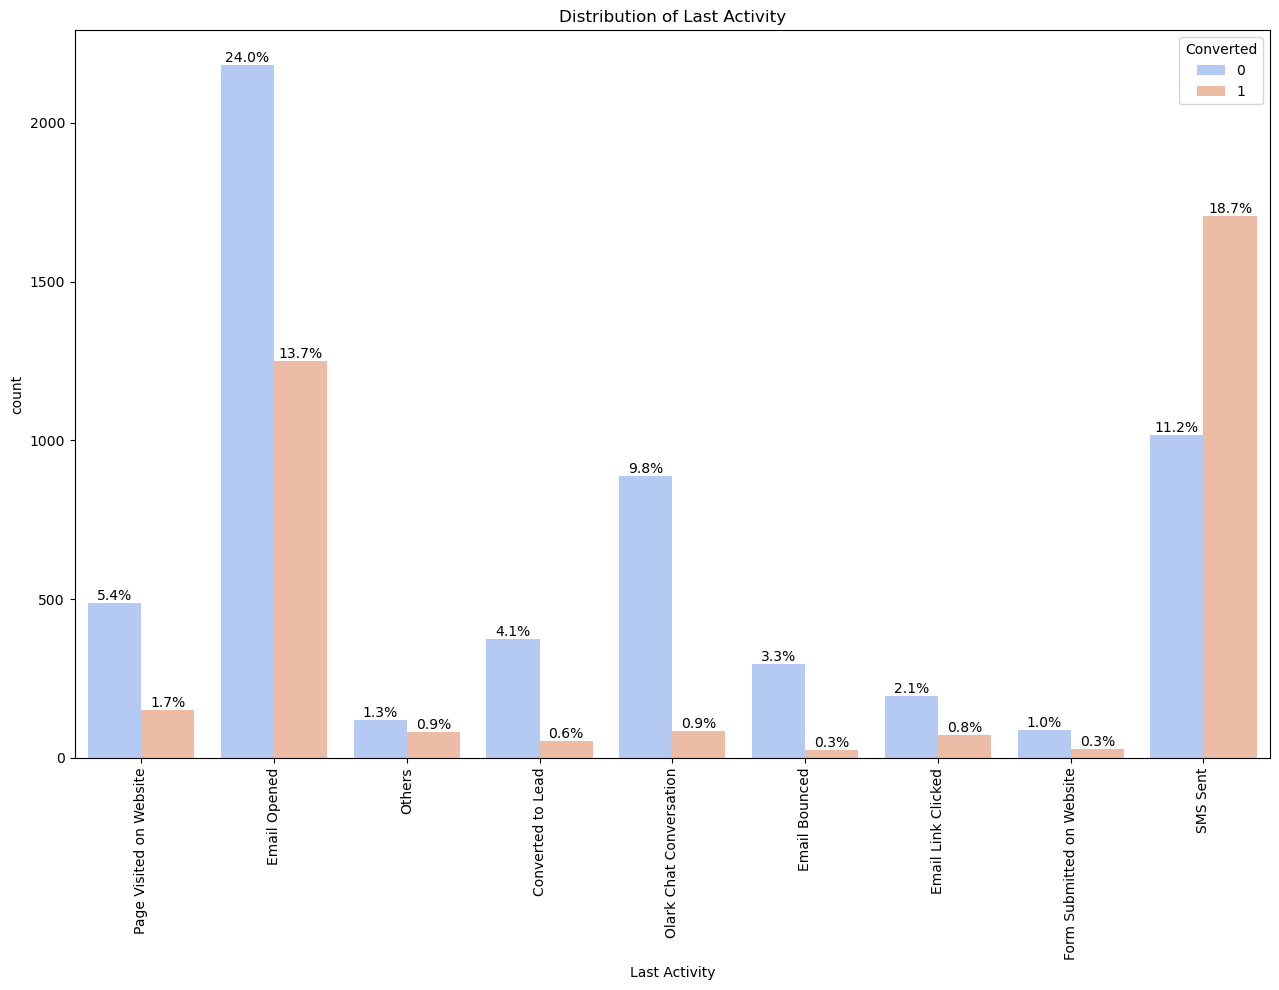

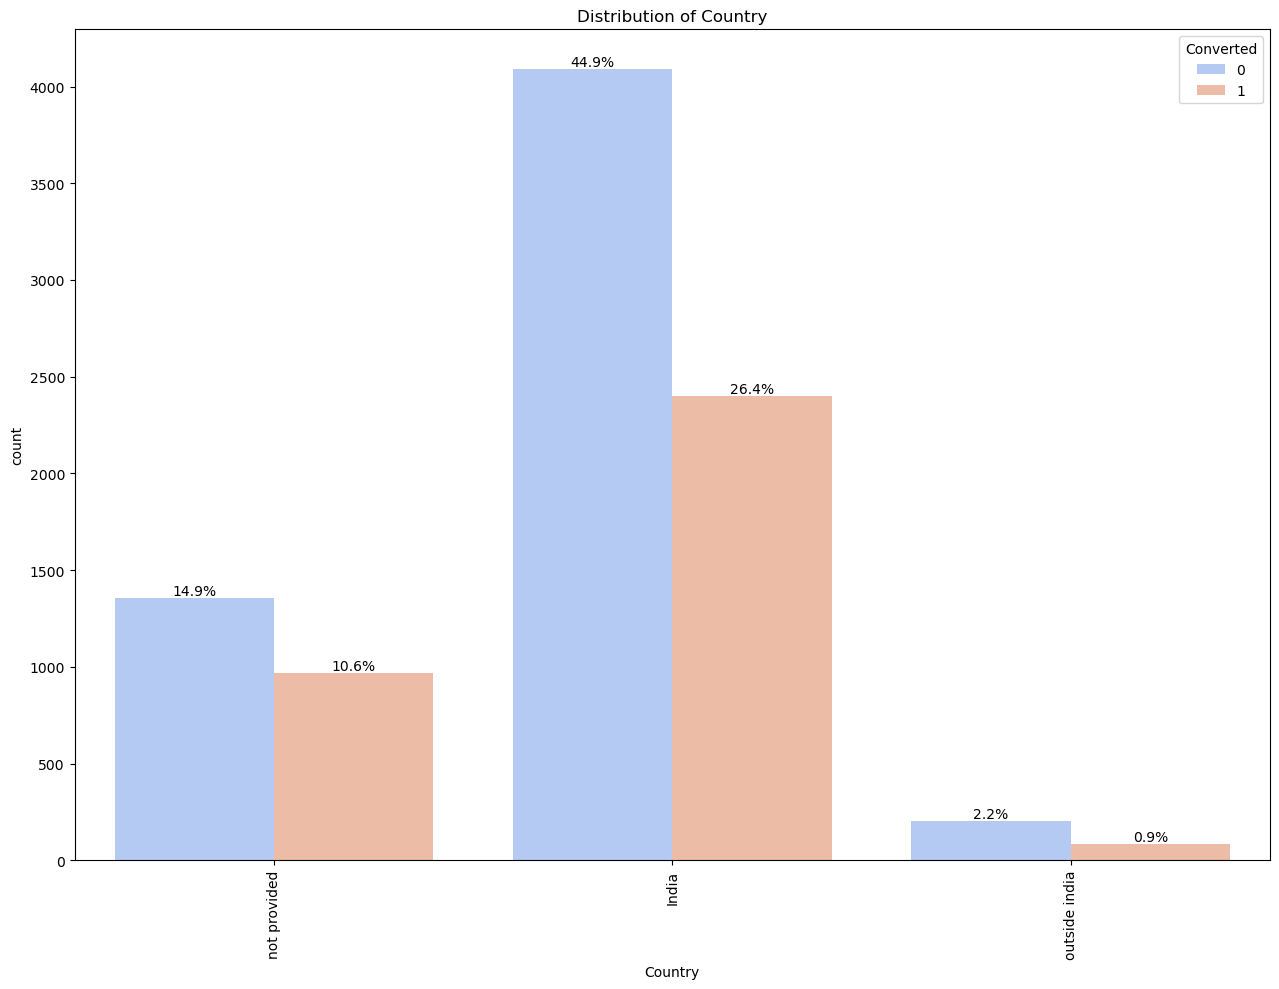

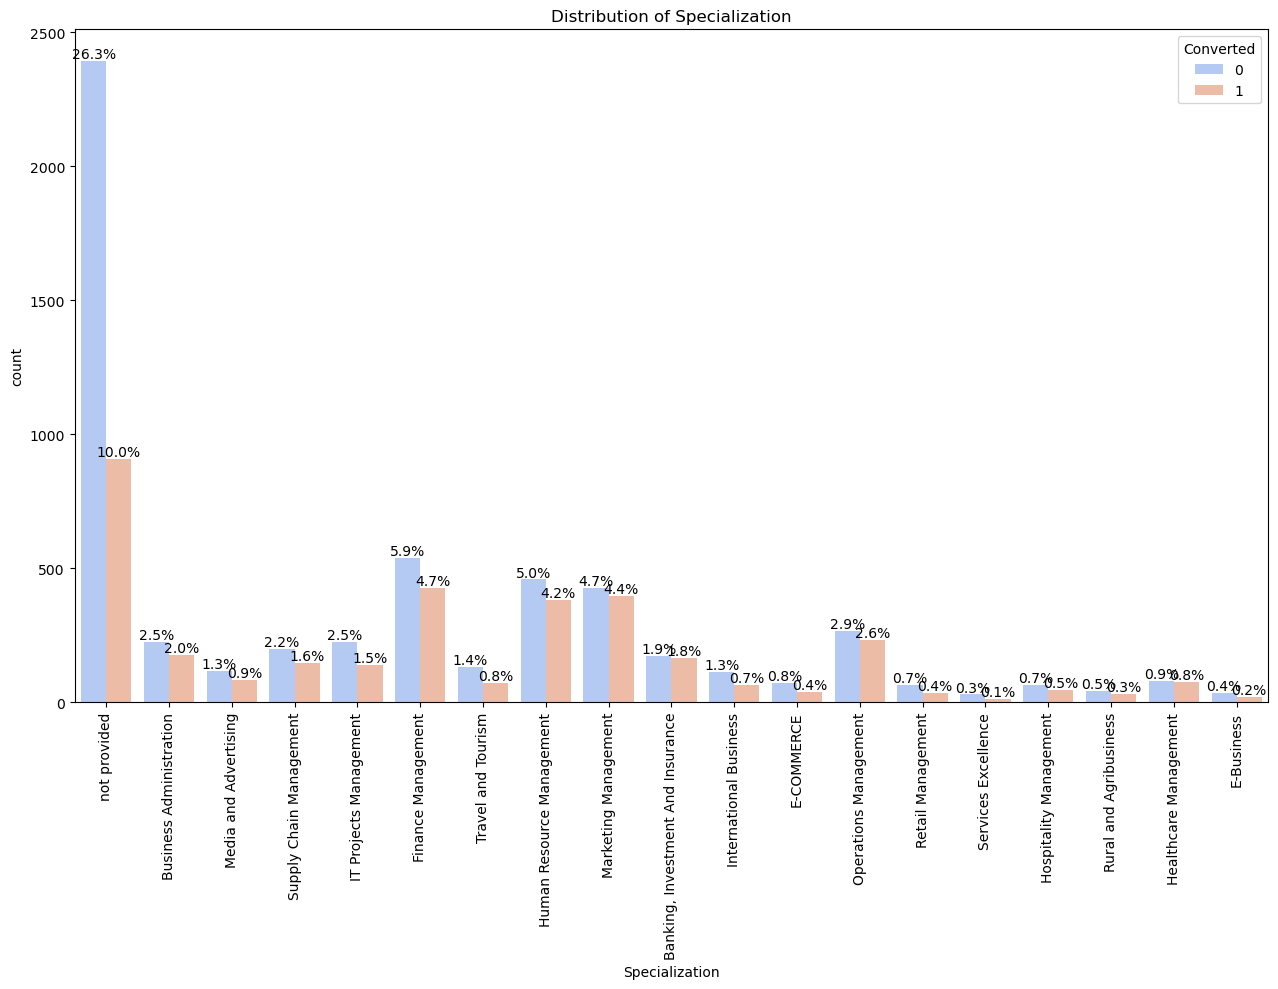

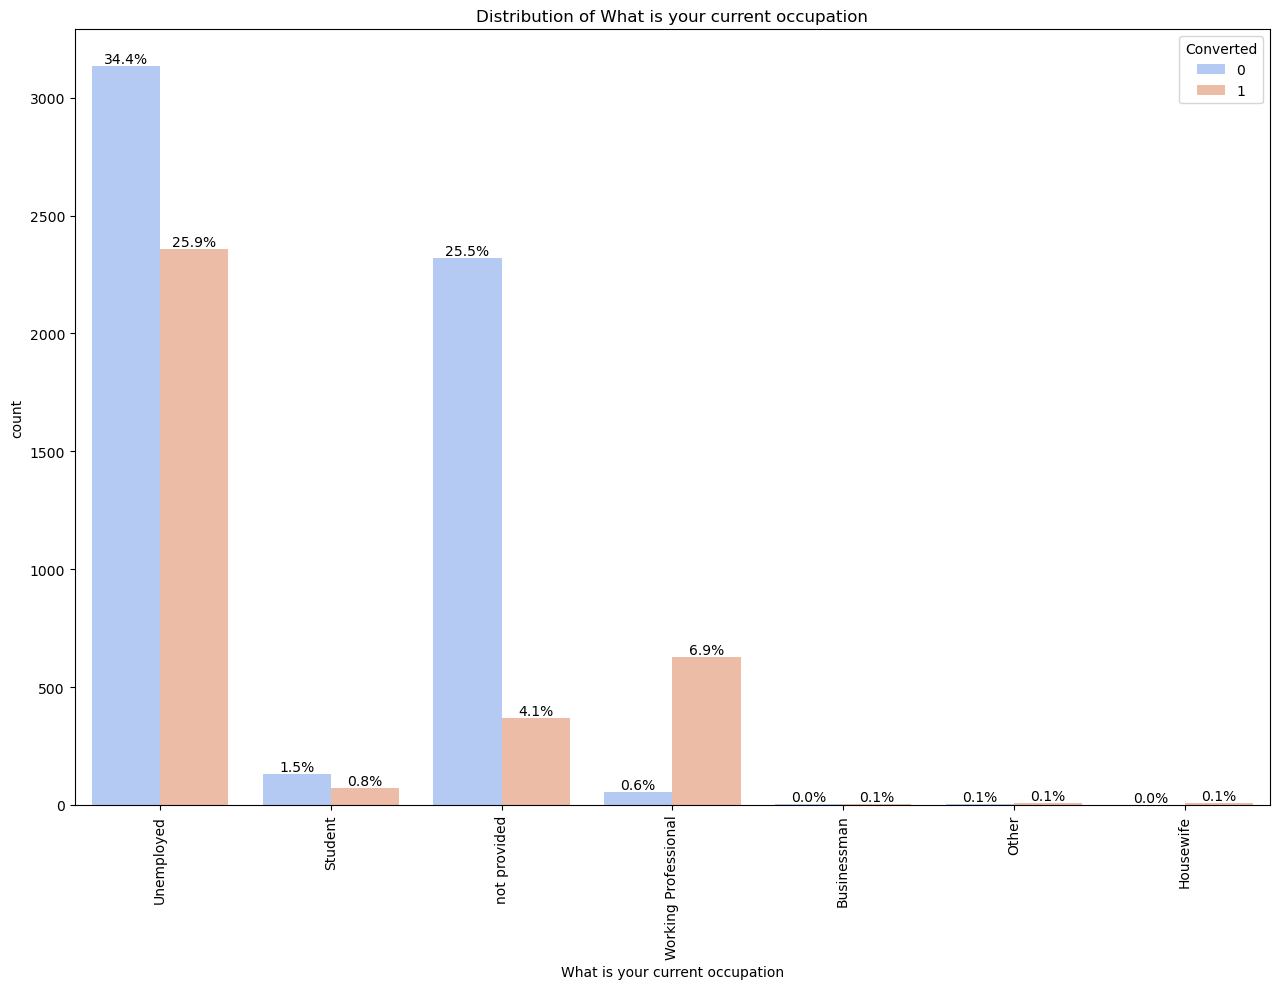

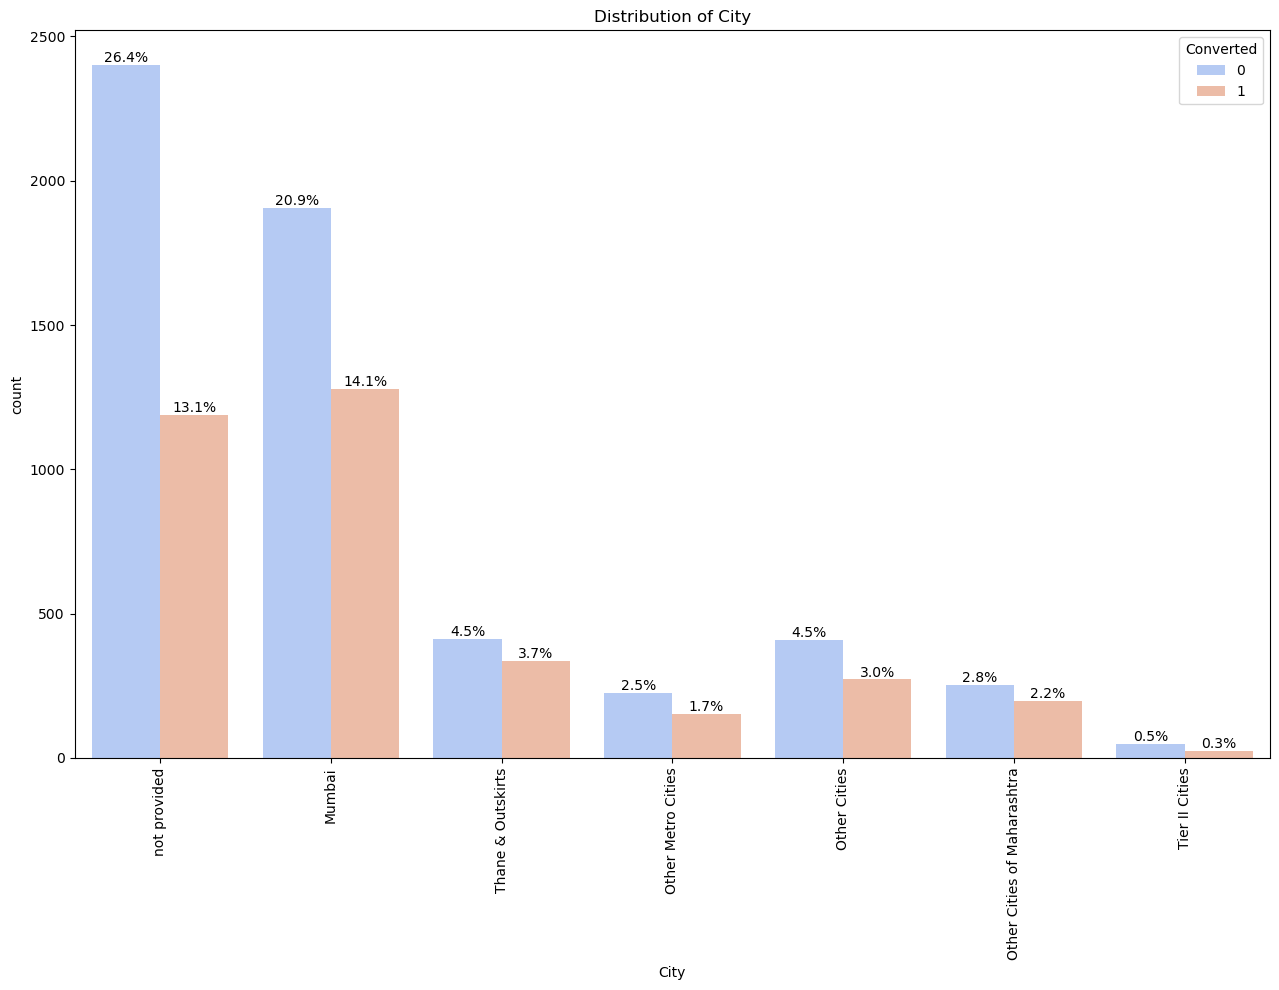

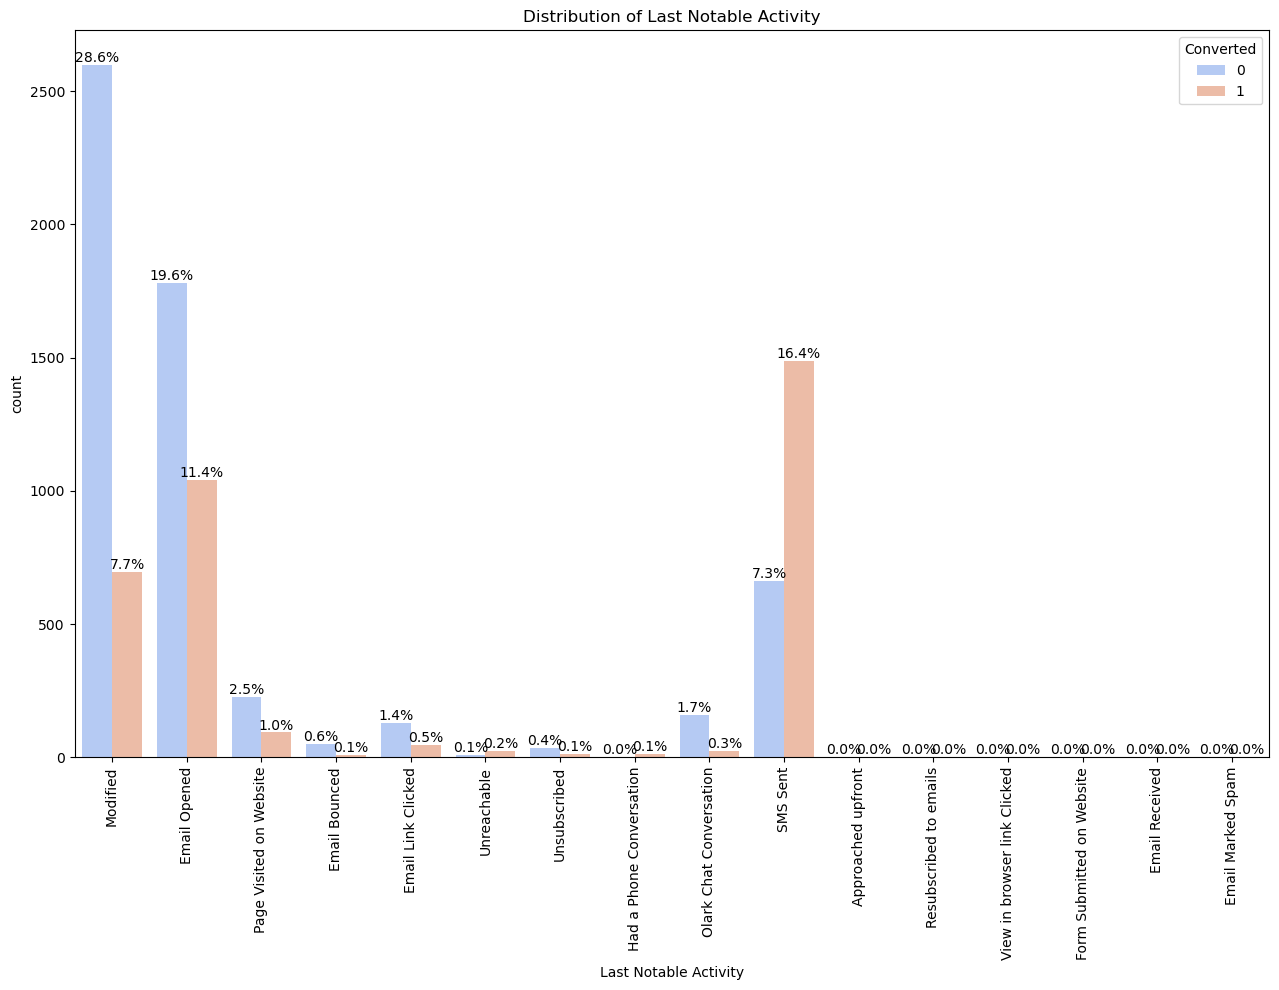

In [82]:
for i in categorical_cols:
    Bivariate_cat(df,variable_name=i)

### Insights
1. **Lead Origin Distribution:**
   - API Leads: 34.3% converted, 27.1% not converted.
   - Landing Page Submission: 19.4% converted, 12.2% not converted.
   - Lead Add Form: 62.7% converted, 0.4% not converted.
   - Lead Import: 0.1% converted, 0.3% not converted.

2. **Last Notable Activity:**
   - Modified: Highest count, both converted and not converted leads.
   - Email Opened: Significant count, relatively lower conversion rate.
   - SMS Sent: Fewer leads, notably higher conversion rate.
   - Other Activities: Fewer leads, generally low conversion rates.

3. **City Distribution:**
   - Majority from "not specified," followed by Mumbai.
   - Conversion rates consistent across cities, highest in "Other Cities" category.

4. **Occupation Impact:**
   - Most leads are unemployed, followed by working professionals.
   - Working professionals have high conversion rates, students low.

5. **Last Activity Insights:**
   - "Page Visited on Website" most common, "SMS Sent" has high conversion.
   - Understanding last activity context crucial for lead management.

6. **Country Distribution:**
   - Majority from "non-specified" country.
   - Conversion rates consistent across countries, highest in "non-specified" category.

7. **Specialization Impact:**
   - "Not Specified" specialization dominant but low conversion.
   - Some specializations show higher conversion despite fewer leads.

# Bivariate Analysis for Numerical Variables

In [83]:
#all numerical columns
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
num_cols

['Do Not Email',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview']

- ploting the numerical columns

<Figure size 2000x1000 with 0 Axes>

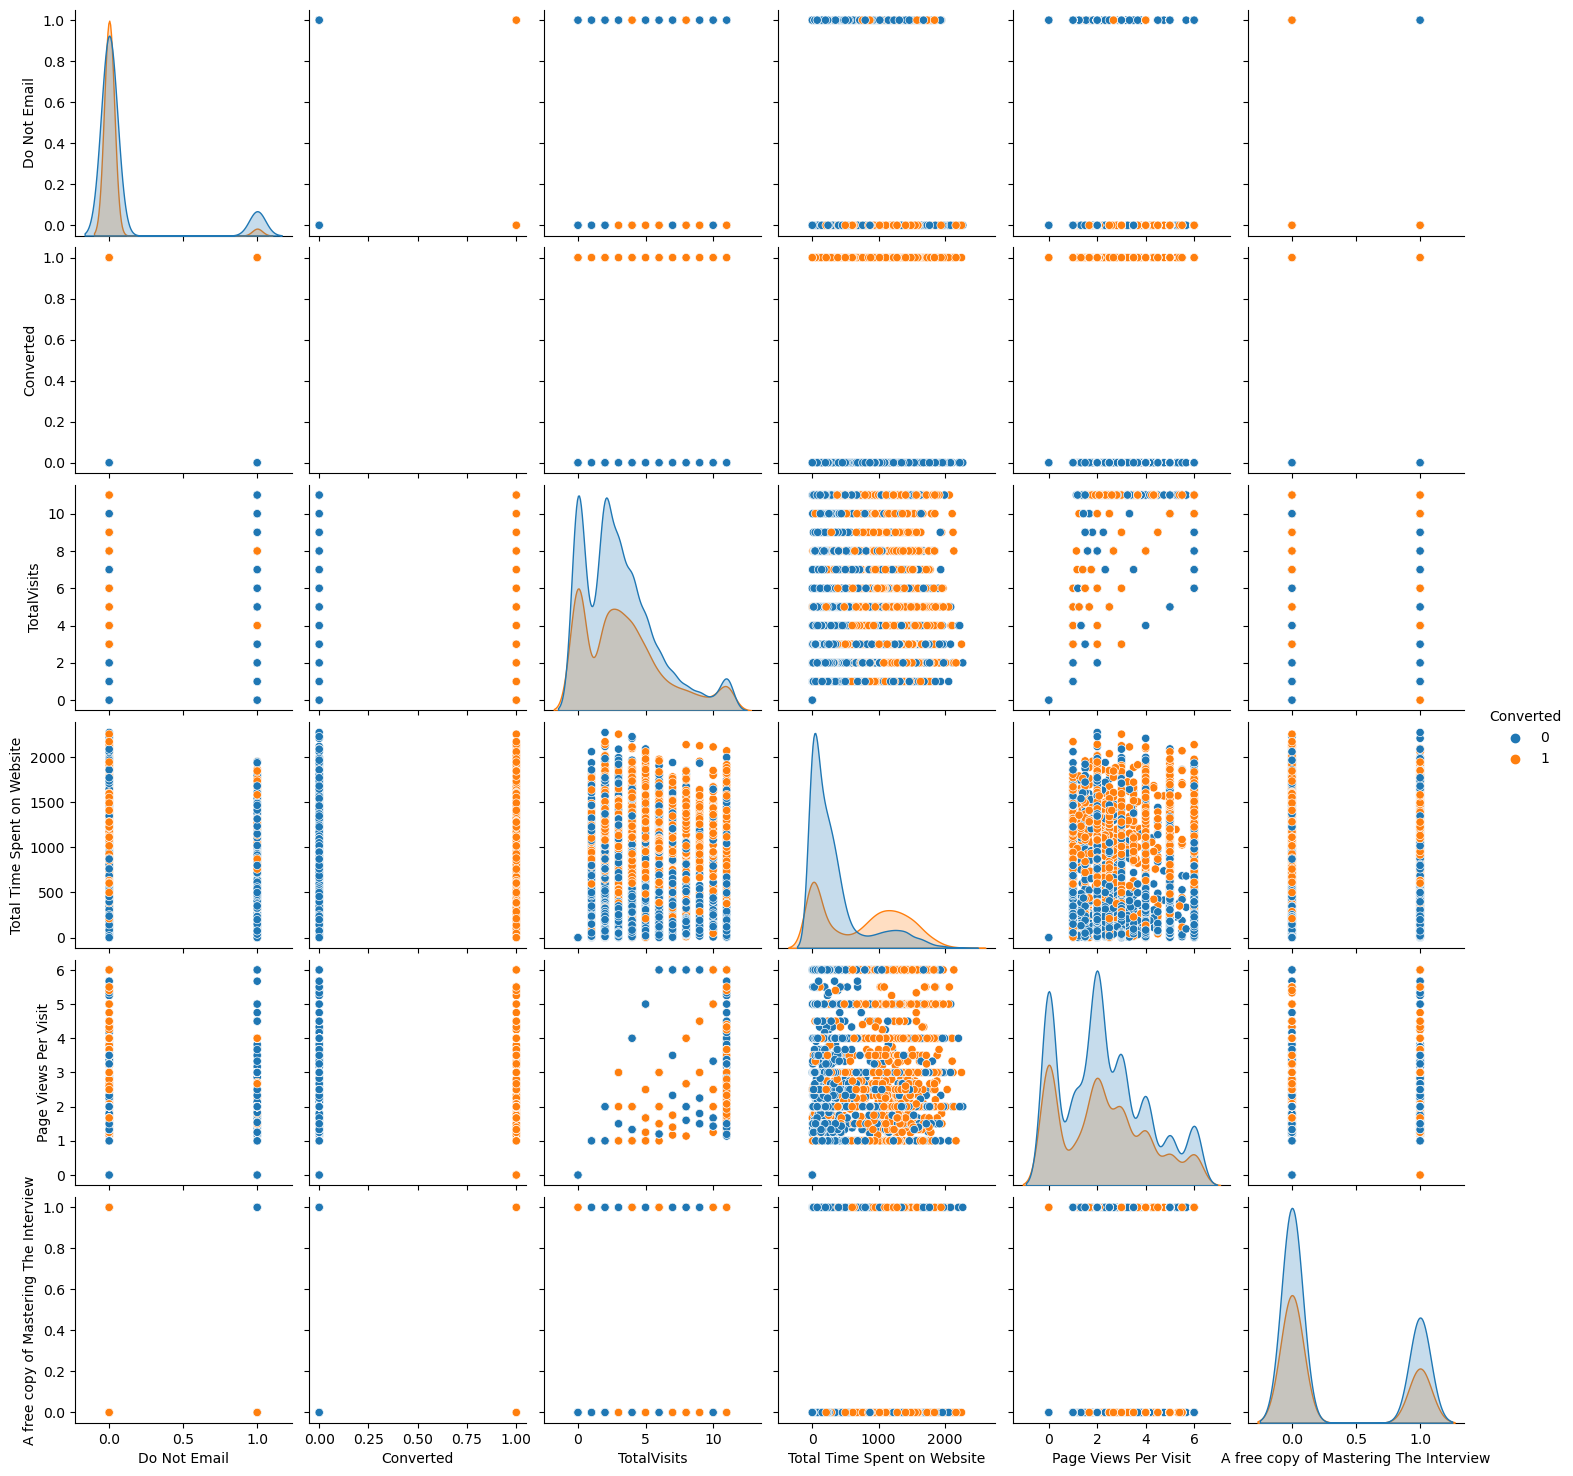

In [84]:
plt.figure(figsize=(20, 10))
sns.pairplot(data=df,vars=num_cols,hue="Converted")                                  
plt.show()

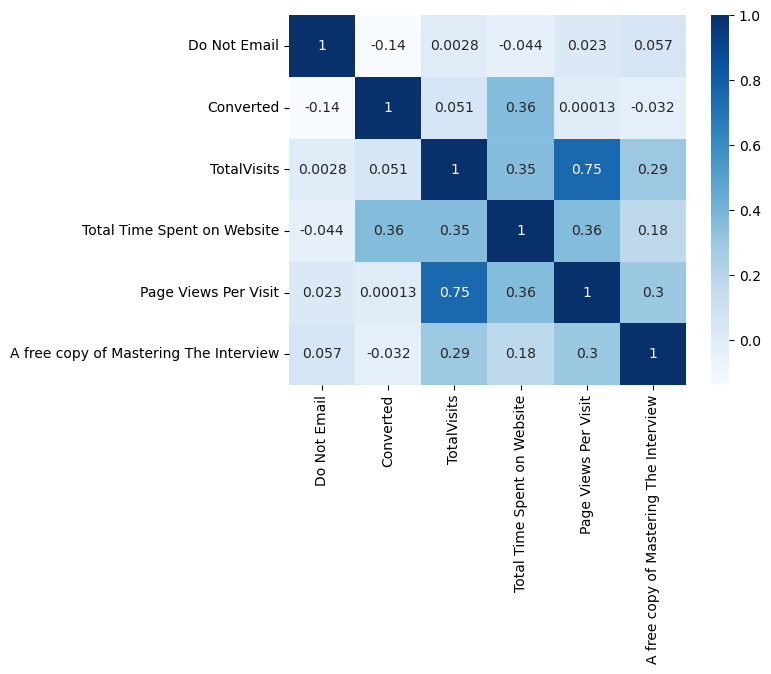

In [85]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

### Converted is highly corelated to the total no. of visits suggesting the direct connection

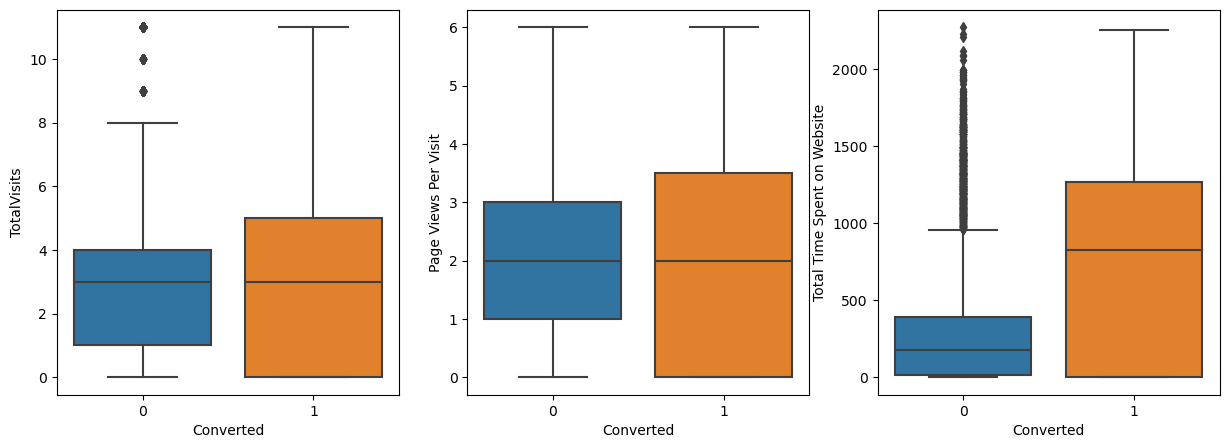

In [86]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

# Data Preparation


### creating the dummy variable

In [87]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,not provided,not provided,Unemployed,not provided,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,not provided,Unemployed,not provided,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,not provided,Unemployed,Mumbai,0,Modified


In [88]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[["Lead Origin","Lead Source","Last Activity","Country","Specialization","What is your current occupation","City","Last Notable Activity"]], drop_first=True,dtype=int)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)
df=df.drop(["Lead Origin","Lead Source","Last Activity","Country","Specialization","What is your current occupation","City","Last Notable Activity"],axis=1)

In [89]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_not provided,Country_outside india,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not provided,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 72 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9103 non-null   int64  
 1   Converted                                             9103 non-null   int64  
 2   TotalVisits                                           9103 non-null   float64
 3   Total Time Spent on Website                           9103 non-null   int64  
 4   Page Views Per Visit                                  9103 non-null   float64
 5   A free copy of Mastering The Interview                9103 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9103 non-null   int32  
 7   Lead Origin_Lead Add Form                             9103 non-null   int32  
 8   Lead Origin_Lead Import                               9103 non-

# splitting the data 

In [91]:
#importing important library
from sklearn.model_selection import train_test_split


In [92]:
# Putting predictor variables to X
X = df.drop('Converted', axis=1)

# Putting Target variables to y
y = df["Converted"]

In [93]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [94]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6372, 71) 
y_train: (6372,)


In [95]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2731, 71) 
y_test: (2731,)


# Scaling of the data

In [96]:
#importing the standardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [97]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [98]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [99]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_not provided,Country_outside india,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not provided,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,-0.293288,0,-1.123070,-0.886862,-1.266761,-0.681676,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.293288,0,0.615410,0.348726,0.131371,-0.681676,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-0.293288,1,-0.427678,1.921626,-0.148256,1.466972,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,-0.293288,0,-0.775374,-0.327731,-0.707508,-0.681676,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.293288,1,-0.427678,1.730971,-0.707508,-0.681676,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [100]:
# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_not provided,Country_outside india,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not provided,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7963,-0.291171,2.346014,2.486792,0.132767,1.477974,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5521,3.434411,1.307999,-0.836090,2.075837,-0.676602,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1951,-0.291171,-0.076021,1.828055,0.410348,-0.676602,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1553,-0.291171,0.269984,1.307999,-0.144815,-0.676602,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9170,-0.291171,-1.114036,-0.890832,-1.255140,-0.676602,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


###  Model Building
- We will Build Logistic Regression Model for predicting categorical variable
- Feature Selection Using RFE (Coarse tuning)
- Manual fine-tuning using p-values and VIFs

In [101]:
# importing important libraries for that
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## RFE
- feature selection using the rfe

In [102]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [103]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 13),
 ('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('A free copy of Mastering The Interview', False, 39),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', False, 26),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Others', False, 23),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 20),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 47),
 ('Last Activity_Olark Chat Conversation', False, 7),
 ('Last Activity_Others', False, 19),
 ('Last Activity_Page Visited on Website', False, 45),
 ('Last Activi

In [104]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Country_not provided', 'Specialization_Hospitality Management',
       'Specialization_not provided',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not provided', 'City_not provided',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [105]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Country_outside india',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
      

In [106]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[rfe_col]

In [107]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    return X

In [108]:
# defining the funtion to train the data 
def train_model(X_train, y_train):

    # Adding a constant variable 
    X_train_sm = sm.add_constant(X_train_rfe)

    # Create a fitted model
    logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()  

    return logm


## Model 1

In [109]:
logm1 = train_model(X_train, y_train)
print(logm1.params)
print(logm1.summary())


const                                                    0.082083
Total Time Spent on Website                              1.141461
Lead Origin_Landing Page Submission                     -1.435776
Lead Origin_Lead Add Form                                1.796450
Lead Origin_Lead Import                                 21.402735
Lead Source_Facebook                                   -22.809439
Lead Source_Welingak Website                             2.924729
Last Activity_Email Opened                               0.984235
Last Activity_SMS Sent                                   1.562858
Country_not provided                                     1.247866
Specialization_Hospitality Management                   -0.968114
Specialization_not provided                             -0.757104
What is your current occupation_Housewife               23.650503
What is your current occupation_Working Professional     2.361934
What is your current occupation_not provided            -1.108731
City_not p

In [110]:
# Dropping 'Lead Origin_Lead' column
X_train_rfe= X_train_rfe.drop(["Lead Origin_Lead Import"], axis = 1)


## Model 2

In [111]:
logm1 = train_model(X_train, y_train)
print(logm1.params)
print(logm1.summary())

const                                                    0.083284
Total Time Spent on Website                              1.141621
Lead Origin_Landing Page Submission                     -1.437556
Lead Origin_Lead Add Form                                1.795011
Lead Source_Facebook                                    -1.430425
Lead Source_Welingak Website                             2.925655
Last Activity_Email Opened                               0.984324
Last Activity_SMS Sent                                   1.562954
Country_not provided                                     1.249098
Specialization_Hospitality Management                   -0.968430
Specialization_not provided                             -0.758831
What is your current occupation_Housewife               23.650369
What is your current occupation_Working Professional     2.362084
What is your current occupation_not provided            -1.108579
City_not provided                                       -0.669660
Last Notab

In [112]:
# Dropping 'Lead Origin_Lead' column
X_train_rfe= X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)


#  Model 3

In [113]:
logm1 = train_model(X_train, y_train)
print(logm1.params)
print(logm1.summary())

const                                                    0.091045
Total Time Spent on Website                              1.141311
Lead Origin_Landing Page Submission                     -1.439285
Lead Origin_Lead Add Form                                1.811325
Lead Source_Facebook                                    -1.431982
Lead Source_Welingak Website                             2.911124
Last Activity_Email Opened                               0.982018
Last Activity_SMS Sent                                   1.558072
Country_not provided                                     1.245723
Specialization_Hospitality Management                   -0.972849
Specialization_not provided                             -0.759913
What is your current occupation_Working Professional     2.357657
What is your current occupation_not provided            -1.110610
City_not provided                                       -0.673197
Last Notable Activity_Email Opened                      -0.660374
Last Notab

In [114]:
# Dropping 'Lead Origin_Lead' column
X_train_rfe= X_train_rfe.drop(["Last Notable Activity_Had a Phone Conversation"], axis = 1)

# Model 4

In [115]:
logm1 = train_model(X_train, y_train)
print(logm1.params)
print(logm1.summary())

const                                                   0.165002
Total Time Spent on Website                             1.136855
Lead Origin_Landing Page Submission                    -1.451315
Lead Origin_Lead Add Form                               1.808417
Lead Source_Facebook                                   -1.429592
Lead Source_Welingak Website                            2.920844
Last Activity_Email Opened                              0.965515
Last Activity_SMS Sent                                  1.508165
Country_not provided                                    1.235353
Specialization_Hospitality Management                  -0.979956
Specialization_not provided                            -0.765917
What is your current occupation_Working Professional    2.353685
What is your current occupation_not provided           -1.113433
City_not provided                                      -0.684731
Last Notable Activity_Email Opened                     -0.701561
Last Notable Activity_Mod

- now as all the p values are under 0.05 now let's se the vif

In [116]:
# Now checking VIFs for all variables in the Model 
get_vif(X_train_rfe)

,Features,VIF
13,Last Notable Activity_Email Opened,8.06
12,City_not provided,7.67
5,Last Activity_Email Opened,7.13
9,Specialization_not provided,6.98
1,Lead Origin_Landing Page Submission,3.76
7,Country_not provided,2.92
14,Last Notable Activity_Modified,2.79
6,Last Activity_SMS Sent,2.37
2,Lead Origin_Lead Add Form,1.96
11,What is your current occupation_not provided,1.66


In [117]:
# Dropping 'Last Notable Activity_Email Opened' column
X_train_rfe= X_train_rfe.drop(["Last Notable Activity_Email Opened"], axis = 1)

# Model 5

In [118]:
logm1 = train_model(X_train, y_train)
print(logm1.params)
print(logm1.summary())

const                                                  -0.005983
Total Time Spent on Website                             1.136626
Lead Origin_Landing Page Submission                    -1.448284
Lead Origin_Lead Add Form                               1.824982
Lead Source_Facebook                                   -1.475628
Lead Source_Welingak Website                            2.922008
Last Activity_Email Opened                              0.502161
Last Activity_SMS Sent                                  1.631136
Country_not provided                                    1.233867
Specialization_Hospitality Management                  -0.975305
Specialization_not provided                            -0.752432
What is your current occupation_Working Professional    2.357682
What is your current occupation_not provided           -1.129840
City_not provided                                      -0.690605
Last Notable Activity_Modified                         -0.787288
Last Notable Activity_Ola

In [119]:
# Now checking VIFs for all variables in the Model 
get_vif(X_train_rfe)

,Features,VIF
12,City_not provided,7.57
9,Specialization_not provided,6.95
1,Lead Origin_Landing Page Submission,3.31
7,Country_not provided,2.91
5,Last Activity_Email Opened,2.31
6,Last Activity_SMS Sent,2.25
13,Last Notable Activity_Modified,1.98
2,Lead Origin_Lead Add Form,1.95
11,What is your current occupation_not provided,1.65
4,Lead Source_Welingak Website,1.36


In [120]:
# Dropping 'City_not provided' column
X_train_rfe= X_train_rfe.drop(["City_not provided"], axis = 1)

# Model 6

In [121]:
logm1 = train_model(X_train, y_train)
print(logm1.params)
print(logm1.summary())

const                                                  -0.233366
Total Time Spent on Website                             1.133311
Lead Origin_Landing Page Submission                    -1.231079
Lead Origin_Lead Add Form                               1.899047
Lead Source_Facebook                                   -0.954264
Lead Source_Welingak Website                            2.882154
Last Activity_Email Opened                              0.520181
Last Activity_SMS Sent                                  1.624320
Country_not provided                                    1.182749
Specialization_Hospitality Management                  -0.965278
Specialization_not provided                            -1.167290
What is your current occupation_Working Professional    2.319598
What is your current occupation_not provided           -1.130216
Last Notable Activity_Modified                         -0.783615
Last Notable Activity_Olark Chat Conversation          -0.677280
Last Notable Activity_Unr

In [122]:
# Now checking VIFs for all variables in the Model 
get_vif(X_train_rfe)

,Features,VIF
1,Lead Origin_Landing Page Submission,3.13
9,Specialization_not provided,2.94
7,Country_not provided,2.83
5,Last Activity_Email Opened,2.25
6,Last Activity_SMS Sent,2.13
2,Lead Origin_Lead Add Form,1.95
12,Last Notable Activity_Modified,1.93
11,What is your current occupation_not provided,1.64
4,Lead Source_Welingak Website,1.35
0,Total Time Spent on Website,1.33


In [123]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_rfe)

    # Create a fitted model
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()  

 No variable needs to be dropped as they all have good VIF values less than 5.

- p-values for all variables is less than 0.05
- This model looks acceptable as everything is under control (p-values & VIFs).
- So we will final our Model 6 for Model Evaluation.

# Model evaluation
- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [124]:
# Getting the predicted values on the train set
y_train_pred = logm.predict(X_train_sm)           # giving prob. of getting 1

y_train_pred[:10]

7963    0.989166
5521    0.028135
1951    0.913613
1553    0.631372
9170    0.330192
5097    0.137343
8953    0.775525
308     0.516811
5520    0.138265
1045    0.215849
dtype: float64

In [125]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98916595, 0.02813477, 0.91361309, 0.63137197, 0.33019214,
       0.13734337, 0.7755246 , 0.51681074, 0.13826534, 0.21584938])

In [126]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head(20)

# y_train.values actual Converted values from df dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,1,0.989166,7963
1,0,0.028135,5521
2,1,0.913613,1951
3,1,0.631372,1553
4,0,0.330192,9170
5,0,0.137343,5097
6,1,0.775525,8953
7,0,0.516811,308
8,0,0.138265,5520
9,1,0.215849,1045


- Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [127]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,1,0.989166,7963,1
1,0,0.028135,5521,0
2,1,0.913613,1951,1
3,1,0.631372,1553,1
4,0,0.330192,9170,0


# Confusion Matrix

In [128]:
# Confusion matrix  (Actual / predicted)
# Importing metrics from sklearn for evaluation
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3486  435]
 [ 723 1728]]


In [129]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3486       |   435
# converted           723        |   1728  


# Above is the confusion matrix when we use threshold of probability as 0.5

### Accuracy

In [130]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8182674199623352


# Metrics beyond simply accuracy
- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability

In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7050183598531212


In [133]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8890589135424637


In [134]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.11094108645753634


In [135]:
# positive predictive value 
print (TP / float(TP+FP))

0.7988904299583911


In [136]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8282252316464719


## Plotting the ROC Curve
- An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [137]:
# function to plot the roc curve

def draw_roc(actual, probs):
    fpr, tpr, _ = metrics.roc_curve(actual, probs)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [138]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

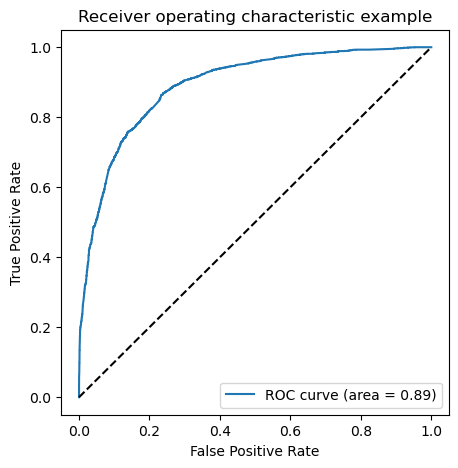

In [139]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

- Area under ROC curve is 0.89 out of 1 which indicates a good predictive model

# Finding Optimal Cutoff Point/ Probability

In [140]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.989166,7963,1,1,1,1,1,1,1,1,1,1,1
1,0,0.028135,5521,0,1,0,0,0,0,0,0,0,0,0
2,1,0.913613,1951,1,1,1,1,1,1,1,1,1,1,1
3,1,0.631372,1553,1,1,1,1,1,1,1,1,0,0,0
4,0,0.330192,9170,0,1,1,1,1,0,0,0,0,0,0


In [141]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384652  1.000000  0.000000
0.1   0.1  0.632925  0.971848  0.421066
0.2   0.2  0.760829  0.916361  0.663606
0.3   0.3  0.796610  0.877193  0.746238
0.4   0.4  0.814501  0.774786  0.839327
0.5   0.5  0.818267  0.705018  0.889059
0.6   0.6  0.804928  0.615259  0.923489
0.7   0.7  0.785154  0.530396  0.944402
0.8   0.8  0.763340  0.436149  0.967865
0.9   0.9  0.719711  0.294166  0.985718


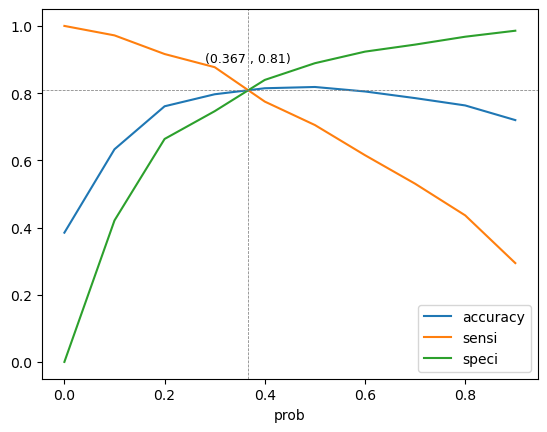

In [142]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

- From the graph it is visible that the optimal cut off is at 0.367.

- Lets do mapping again using optimal cutoff point

In [143]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.367 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,1,0.989166,7963,1
1,0,0.028135,5521,0
2,1,0.913613,1951,1
3,1,0.631372,1553,1
4,0,0.330192,9170,0


In [144]:
# features and their coefficicent from final model
parameters=logm.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website                            2.882154
What is your current occupation_Working Professional    2.319598
Lead Origin_Lead Add Form                               1.899047
Last Notable Activity_Unreachable                       1.660718
Last Activity_SMS Sent                                  1.624320
Country_not provided                                    1.182749
Total Time Spent on Website                             1.133311
Last Activity_Email Opened                              0.520181
const                                                  -0.233366
Last Notable Activity_Olark Chat Conversation          -0.677280
Last Notable Activity_Modified                         -0.783615
Lead Source_Facebook                                   -0.954264
Specialization_Hospitality Management                  -0.965278
What is your current occupation_not provided           -1.130216
Specialization_not provided                            -1.167290
Lead Origin_Landing Page 

### Calculating all metrics using confusion matrix for Train

- checking the accuracy

In [145]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8096359070935342


- creating the confusion metrics

In [146]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print(confusion_matrix)

[[3196  725]
 [ 488 1963]]


In [147]:
#substituting the values of the confusion matrix
TN =confusion_matrix[0,0]
TP =confusion_matrix[1,1]
FP =confusion_matrix[0,1]
FN =confusion_matrix[1,0]

In [148]:
# printing the values of confusion matrix
print ("True Negative   : ", TN)
print ("True Positive   : ", TP)
print ("False Negative  : ", FN)
print ("False Positve   : ", FP) 

True Negative   :  3196
True Positive   :  1963
False Negative  :  488
False Positve   :  725


In [149]:
# calculating the accuracy, sensitivity, specitivity, precision, recall
accuracy = (TN+TP)/(TN+TP+FN+FP)
print ("Model Accuracy : ", round(accuracy,4))
sensi = TP/(TP+FN)
print ("Model Sensitivity : ", round(sensi,4))
speci = TN/(TN+FP)
print ("Model Specificity: ", round(speci,4))
precision = TP/(TP+FP)
print ("Model Precision : ", round(precision,4))
recall = TP/(TP+FN)
print ("Model Recall : ", round(recall,4))

Model Accuracy :  0.8096
Model Sensitivity :  0.8009
Model Specificity:  0.8151
Model Precision :  0.7303
Model Recall :  0.8009


### Precision and recall tradeoff

- Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [150]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

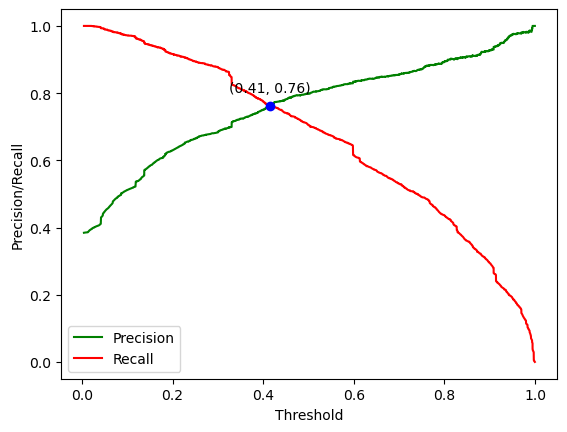

In [151]:

# Plotting Precision-Recall curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# Calculating intersection point
idx = np.argwhere(np.diff(np.sign(p[:-1] - r[:-1]))).flatten()
intersection_threshold = thresholds[idx][0]
intersection_value = p[idx][0]

# Annotating intersection point on plot
plt.plot(intersection_threshold, intersection_value, 'bo') 
plt.annotate(f'({intersection_threshold:.2f}, {intersection_value:.2f})', 
             (intersection_threshold, intersection_value),
             textcoords="offset points",
             xytext=(0,10),
             ha='center')

# Add legend and axis labels
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

# Show plot
plt.show()


- The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.42 from above curve.

In [152]:
# copying df to test model evaluation with precision recall threshold of 0.42
y_train_precision_recall = y_train_pred_final.copy()

In [153]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.42 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,1,0.989166,7963,1,1
1,0,0.028135,5521,0,0
2,1,0.913613,1951,1,1
3,1,0.631372,1553,1,1
4,0,0.330192,9170,0,0


In [154]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,1,0.989166,7963,1,99
1,0,0.028135,5521,0,3
2,1,0.913613,1951,1,91
3,1,0.631372,1553,1,63
4,0,0.330192,9170,0,33


In [155]:
## Lets see all matrics at 0.42 cutoff in precision-recall view and compare it with 0.359 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("#"*50,"\n")
#substituting the values of the confusion matrix
TN =confusion_matrix[0,0]
TP =confusion_matrix[1,1]
FP =confusion_matrix[0,1]
FN =confusion_matrix[1,0]
# printing the values of confusion matrix
print ("True Negative   : ", TN)
print ("True Positive   : ", TP)
print ("False Negative  : ", FN)
print ("False Positve   : ", FP) 
# calculating the accuracy, sensitivity, specitivity, precision, recall
accuracy = (TN+TP)/(TN+TP+FN+FP)
print ("Model Accuracy : ", round(accuracy,4))
sensi = TP/(TP+FN)
print ("Model Sensitivity : ", round(sensi,4))
speci = TN/(TN+FP)
print ("Model Specificity: ", round(speci,4))
precision = TP/(TP+FP)
print ("Model Precision : ", round(precision,4))
recall = TP/(TP+FN)
print ("Model Recall : ", round(recall,4))
print("\n")
print("#"*50,"\n")

************************************************** 

Confusion Matrix
[[3356  565]
 [ 587 1864]] 

################################################## 

True Negative   :  3356
True Positive   :  1864
False Negative  :  587
False Positve   :  565
Model Accuracy :  0.8192
Model Sensitivity :  0.7605
Model Specificity:  0.8559
Model Precision :  0.7674
Model Recall :  0.7605


################################################## 



- As we can see in above metrics when we used precision-recall threshold cut-off of 0.42 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 76%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.359. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

# Making Predictions on test set

### Scaling Test dataset

In [156]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2731 entries, 3497 to 5828
Data columns (total 71 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2731 non-null   int64  
 1   TotalVisits                                           2731 non-null   float64
 2   Total Time Spent on Website                           2731 non-null   int64  
 3   Page Views Per Visit                                  2731 non-null   float64
 4   A free copy of Mastering The Interview                2731 non-null   int64  
 5   Lead Origin_Landing Page Submission                   2731 non-null   int32  
 6   Lead Origin_Lead Add Form                             2731 non-null   int32  
 7   Lead Origin_Lead Import                               2731 non-null   int32  
 8   Lead Source_Facebook                                  2731 n

In [157]:
col=X_train_rfe.columns
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Country_not provided',
       'Specialization_Hospitality Management', 'Specialization_not provided',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not provided',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [158]:
# scaling the numerical test set
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [129]:

X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_SMS Sent,Country_not provided,Specialization_Hospitality Management,Specialization_not provided,What is your current occupation_Working Professional,What is your current occupation_not provided,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
3497,1.0,-0.886862,0,1,0,0,1,0,1,0,0,0,0,0,0,0
4044,1.0,-0.886862,0,0,0,0,0,1,1,0,0,0,0,0,0,0
7200,1.0,-0.611880,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1183,1.0,-0.886862,0,0,0,0,0,0,1,0,1,0,0,1,0,0
8216,1.0,-0.822700,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [160]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = logm1.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.914003
1,1,0.827586
2,0,0.053266
3,0,0.118510
4,0,0.030376


In [128]:
# Making prediction using cut off 0.358
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.367 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1,0.914003,1,91
1,1,0.827586,1,83
2,0,0.053266,0,5
3,0,0.118510,0,12
4,0,0.030376,0,3


In [162]:
# Creating confusion matrix 
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )


In [163]:

print("*"*50,"\n")

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("#"*50,"\n")
#substituting the values of the confusion matrix
TN =confusion_matrix[0,0]
TP =confusion_matrix[1,1]
FP =confusion_matrix[0,1]
FN =confusion_matrix[1,0]
# printing the values of confusion matrix
print ("True Negative   : ", TN)
print ("True Positive   : ", TP)
print ("False Negative  : ", FN)
print ("False Positve   : ", FP) 
# calculating the accuracy, sensitivity, specitivity, precision, recall
accuracy = (TN+TP)/(TN+TP+FN+FP)
print ("Model Accuracy : ", round(accuracy,4))
sensi = TP/(TP+FN)
print ("Model Sensitivity : ", round(sensi,4))
speci = TN/(TN+FP)
print ("Model Specificity: ", round(speci,4))
precision = TP/(TP+FP)
print ("Model Precision : ", round(precision,4))
recall = TP/(TP+FN)
print ("Model Recall : ", round(recall,4))
print("\n")
print("#"*50,"\n")

************************************************** 

Confusion Matrix
[[1413  317]
 [ 213  788]] 

################################################## 

True Negative   :  1413
True Positive   :  788
False Negative  :  213
False Positve   :  317
Model Accuracy :  0.8059
Model Sensitivity :  0.7872
Model Specificity:  0.8168
Model Precision :  0.7131
Model Recall :  0.7872


################################################## 



In [164]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Conversion_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1,0.914003,1,91
1,1,0.827586,1,83
2,0,0.053266,0,5
3,0,0.118510,0,12
4,0,0.030376,0,3


## Conclusion
- Train - Test
- Train Data Set:
-- Accuracy: 80.96%

-- Sensitivity: 80.09%

-- Specificity: 81.51%

-- Recall :  80.09%

- Test Data Set:

-- Accuracy: 80.59%

-- Sensitivity: 78.72%~79%

-- Specificity: 81.68%

-- Recall :  78.72%~79%

- The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across       different evaluation metrics in both test and train dataset.

- The model achieved a sensitivity of 81.51% in the train set and 78.72%~79% in the test set, using a cut-off value of 0.367.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- The CEO of X Education had set a target sensitivity of around 80%.
- The model also achieved an accuracy of 80.59%, which is in line with the study's objectives.

# Model parameters

The Optimal cutoff probability point is 0.345.Converted probability greater than 0.367 will be predicted as Converted lead (Hot lead) & probability smaller than 0.367 will be predicted as not Converted lead (Cold lead).

* Top 3 features that contributing positively to predicting hot leads in the model are:
- Lead Source_Welingak Website
- What is your current occupation_Working Professional
- Lead Origin_Lead Add Form 

* Top 3 features that contributing negatively to predicting hot leads in the model are:

- Lead Origin_Landing Page Submission
- Specialization_not provided
- What is your current occupation_not provided

In [165]:
# features and their coefficicent from final model
parameters=logm.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website                            2.882154
What is your current occupation_Working Professional    2.319598
Lead Origin_Lead Add Form                               1.899047
Last Notable Activity_Unreachable                       1.660718
Last Activity_SMS Sent                                  1.624320
Country_not provided                                    1.182749
Total Time Spent on Website                             1.133311
Last Activity_Email Opened                              0.520181
const                                                  -0.233366
Last Notable Activity_Olark Chat Conversation          -0.677280
Last Notable Activity_Modified                         -0.783615
Lead Source_Facebook                                   -0.954264
Specialization_Hospitality Management                  -0.965278
What is your current occupation_not provided           -1.130216
Specialization_not provided                            -1.167290
Lead Origin_Landing Page 

## Increasing Lead Conversion Rates:
- Feature Focus: Prioritize features with positive coefficients for targeted marketing strategies.
- Quality Leads: Develop strategies to attract high-quality leads from top-performing sources.
- Tailored Messaging: Engage working professionals with personalized communication.
- Optimize Channels: Analyze lead engagement impact and optimize communication channels accordingly.
- Budget Allocation: Allocate more budget for advertising on the Welingak website.
- Incentives for Referrals: Offer incentives or discounts for successful referrals that convert to leads.
- Target Working Professionals: Aggressively target working professionals due to their higher conversion rates and potentially better financial situations.
- Enhance Website Appeal: Improve the website’s attractiveness and engagement to encourage longer visits and increase the chances of course purchases.
## Areas for Improvement:
- Current Occupation: Address the issue of missing data for “current occupation.”
- Specialization Analysis: Investigate negative coefficients related to specialization and prompt users to provide this information.
- Landing Page Optimization: Review the landing page submission process for potential areas of improvement.